In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [250]:
per_capita=pd.read_csv('C:/Users/m8rqu/Documents/Data BootCamp/Econ/Data/gdp_3.csv')
building = pd.read_csv("C:/Users/m8rqu/Documents/Data BootCamp/Econ/Data/infra-data.csv")
corrupt = pd.read_csv('C:/Users/m8rqu/Documents/Data BootCamp/Econ/Data/corrupt_4.csv')
learning = pd.read_csv('C:/Users/m8rqu/Documents/Data BootCamp/Econ/Data/avgIQpercountry.csv')


In [251]:
print(per_capita.columns)
print('-------------------')
print(building.columns)
print('-------------------')
print(corrupt.columns)
print('-------------------')
print(learning.columns)

Index(['Country/Territory', 'UN region', 'Forecast', 'Year[IMF]',
       'Estimate[World Bank]', 'Year[World Bank]', 'Estimate[United Nations]',
       'Year[United Nations]'],
      dtype='object')
-------------------
Index(['Country', 'Total', 'RoadConnectivity', 'QualityOfRoad',
       'RailroadDensity', 'EfficiencyOfTrainServices', 'AirportConnectivity',
       'EfficiencyOfTransportServices'],
      dtype='object')
-------------------
Index(['Country/Territory', '2022_corrupt', '2021_corrupt', '2020_corrupt'], dtype='object')
-------------------
Index(['Rank', 'Country/Territory', 'Average IQ', 'Continent', 'Literacy Rate',
       'Nobel Prices', 'HDI (2021)', 'Mean years of schooling - 2021',
       ' GNI - 2021', 'Population - 2023'],
      dtype='object')


In [252]:
building.rename(columns = {'Country':'Country/Territory'},inplace=True)


In [253]:
print(per_capita.columns)
print('-------------------')
print(building.columns)
print('-------------------')
print(corrupt.columns)
print('-------------------')
print(learning.columns)

Index(['Country/Territory', 'UN region', 'Forecast', 'Year[IMF]',
       'Estimate[World Bank]', 'Year[World Bank]', 'Estimate[United Nations]',
       'Year[United Nations]'],
      dtype='object')
-------------------
Index(['Country/Territory', 'Total', 'RoadConnectivity', 'QualityOfRoad',
       'RailroadDensity', 'EfficiencyOfTrainServices', 'AirportConnectivity',
       'EfficiencyOfTransportServices'],
      dtype='object')
-------------------
Index(['Country/Territory', '2022_corrupt', '2021_corrupt', '2020_corrupt'], dtype='object')
-------------------
Index(['Rank', 'Country/Territory', 'Average IQ', 'Continent', 'Literacy Rate',
       'Nobel Prices', 'HDI (2021)', 'Mean years of schooling - 2021',
       ' GNI - 2021', 'Population - 2023'],
      dtype='object')


In [254]:
merge_data = pd.merge(per_capita,building, how = 'outer', on =['Country/Territory'])
merge_data

,Country/Territory,UN region,Forecast,Year[IMF],Estimate[World Bank],Year[World Bank],Estimate[United Nations],Year[United Nations],Total,RoadConnectivity,QualityOfRoad,RailroadDensity,EfficiencyOfTrainServices,AirportConnectivity,EfficiencyOfTransportServices
0,Monaco,Europe,—,—,234317,2021,234317,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Liechtenstein,Europe,—,—,184083,2021,169260,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Luxembourg,Europe,135605,2023,126426,2022,133745,2021,85.0,71.3,75.6,100.0,66.4,37.8,77.0
3,Bermuda,Americas,—,—,118846,2022,112653,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ireland,Europe,112248,2023,104039,2022,101109,2021,77.0,88.4,56.7,68.5,49.3,68.1,74.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,South Sudan,Africa,417,2023,1072,2015,400,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Sierra Leone,Africa,415,2023,461,2022,505,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,Afghanistan,Asia,443,2021,364,2022,373,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,Burundi,Africa,246,2023,238,2022,311,2021,39.2,53.6,48.9,NaN,NaN,6.2,46.5


In [255]:
merge_data=merge_data.dropna()
merge_data

,Country/Territory,UN region,Forecast,Year[IMF],Estimate[World Bank],Year[World Bank],Estimate[United Nations],Year[United Nations],Total,RoadConnectivity,QualityOfRoad,RailroadDensity,EfficiencyOfTrainServices,AirportConnectivity,EfficiencyOfTransportServices
2,Luxembourg,Europe,135605,2023,126426,2022,133745,2021,85.0,71.3,75.6,100.0,66.4,37.8,77.0
4,Ireland,Europe,112248,2023,104039,2022,101109,2021,77.0,88.4,56.7,68.5,49.3,68.1,74.7
5,Switzerland,Europe,102865,2023,92102,2022,93525,2021,93.2,84.4,88.0,100.0,90.8,76.7,85.0
6,Norway,Europe,99266,2023,106149,2022,89242,2021,75.8,66.0,59.2,28.3,57.6,67.6,75.9
10,United States,Americas,80412,2023,76399,2022,69185,2021,87.9,100.0,74.5,41.3,69.2,100.0,79.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Burkina Faso,Africa,888,2023,833,2022,893,2021,34.8,80.0,29.5,4.7,25.8,14.9,40.5
209,DR Congo,Africa,675,2023,587,2022,551,2021,29.2,59.3,18.4,4.0,15.3,16.9,30.7
211,Mozambique,Africa,647,2023,542,2022,492,2021,35.2,68.0,23.4,9.9,27.2,18.9,33.4
215,Malawi,Africa,580,2023,645,2022,613,2021,35.6,78.4,30.1,20.3,18.5,12.8,39.0


In [256]:
merge_data_2 = pd.merge(merge_data,corrupt, how = 'left', on =['Country/Territory'])
merge_data_2

,Country/Territory,UN region,Forecast,Year[IMF],Estimate[World Bank],Year[World Bank],Estimate[United Nations],Year[United Nations],Total,RoadConnectivity,QualityOfRoad,RailroadDensity,EfficiencyOfTrainServices,AirportConnectivity,EfficiencyOfTransportServices,2022_corrupt,2021_corrupt,2020_corrupt
0,Luxembourg,Europe,135605,2023,126426,2022,133745,2021,85.0,71.3,75.6,100.0,66.4,37.8,77.0,77,81,80
1,Ireland,Europe,112248,2023,104039,2022,101109,2021,77.0,88.4,56.7,68.5,49.3,68.1,74.7,77,74,72
2,Switzerland,Europe,102865,2023,92102,2022,93525,2021,93.2,84.4,88.0,100.0,90.8,76.7,85.0,82,84,85
3,Norway,Europe,99266,2023,106149,2022,89242,2021,75.8,66.0,59.2,28.3,57.6,67.6,75.9,84,85,84
4,United States,Americas,80412,2023,76399,2022,69185,2021,87.9,100.0,74.5,41.3,69.2,100.0,79.6,69,67,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Burkina Faso,Africa,888,2023,833,2022,893,2021,34.8,80.0,29.5,4.7,25.8,14.9,40.5,42,42,40
98,DR Congo,Africa,675,2023,587,2022,551,2021,29.2,59.3,18.4,4.0,15.3,16.9,30.7,NaN,NaN,NaN
99,Mozambique,Africa,647,2023,542,2022,492,2021,35.2,68.0,23.4,9.9,27.2,18.9,33.4,26,26,25
100,Malawi,Africa,580,2023,645,2022,613,2021,35.6,78.4,30.1,20.3,18.5,12.8,39.0,34,35,30


In [257]:
merge_data_2=merge_data_2.dropna()
merge_data_2

,Country/Territory,UN region,Forecast,Year[IMF],Estimate[World Bank],Year[World Bank],Estimate[United Nations],Year[United Nations],Total,RoadConnectivity,QualityOfRoad,RailroadDensity,EfficiencyOfTrainServices,AirportConnectivity,EfficiencyOfTransportServices,2022_corrupt,2021_corrupt,2020_corrupt
0,Luxembourg,Europe,135605,2023,126426,2022,133745,2021,85.0,71.3,75.6,100.0,66.4,37.8,77.0,77,81,80
1,Ireland,Europe,112248,2023,104039,2022,101109,2021,77.0,88.4,56.7,68.5,49.3,68.1,74.7,77,74,72
2,Switzerland,Europe,102865,2023,92102,2022,93525,2021,93.2,84.4,88.0,100.0,90.8,76.7,85.0,82,84,85
3,Norway,Europe,99266,2023,106149,2022,89242,2021,75.8,66.0,59.2,28.3,57.6,67.6,75.9,84,85,84
4,United States,Americas,80412,2023,76399,2022,69185,2021,87.9,100.0,74.5,41.3,69.2,100.0,79.6,69,67,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Tajikistan,Asia,1180,2023,1054,2022,897,2021,60.6,35.8,58.2,11.2,51.0,23.8,57.9,24,25,25
97,Burkina Faso,Africa,888,2023,833,2022,893,2021,34.8,80.0,29.5,4.7,25.8,14.9,40.5,42,42,40
99,Mozambique,Africa,647,2023,542,2022,492,2021,35.2,68.0,23.4,9.9,27.2,18.9,33.4,26,26,25
100,Malawi,Africa,580,2023,645,2022,613,2021,35.6,78.4,30.1,20.3,18.5,12.8,39.0,34,35,30


In [258]:
merge_data_3 = pd.merge(merge_data_2,learning, how = 'left', on =['Country/Territory'])
merge_data_3

,Country/Territory,UN region,Forecast,Year[IMF],Estimate[World Bank],Year[World Bank],Estimate[United Nations],Year[United Nations],Total,RoadConnectivity,...,2020_corrupt,Rank,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,Luxembourg,Europe,135605,2023,126426,2022,133745,2021,85.0,71.3,...,80,13.0,99.87,Europe,1.00,2.0,0.930,13.0,84649.0,654.768
1,Ireland,Europe,112248,2023,104039,2022,101109,2021,77.0,88.4,...,72,38.0,95.13,Europe,0.99,11.0,0.945,11.6,76169.0,5056935
2,Switzerland,Europe,102865,2023,92102,2022,93525,2021,93.2,84.4,...,85,19.0,99.24,Europe,0.99,27.0,0.962,13.9,66933.0,8796669
3,Norway,Europe,99266,2023,106149,2022,89242,2021,75.8,66.0,...,84,29.0,97.13,Europe,1.00,13.0,0.961,13.0,64660.0,5474360
4,United States,Americas,80412,2023,76399,2022,69185,2021,87.9,100.0,...,67,28.0,97.43,North America,0.99,400.0,0.921,13.7,64765.0,339996564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Tajikistan,Asia,1180,2023,1054,2022,897,2021,60.6,35.8,...,25,70.0,87.71,Asia,1.00,0.0,0.685,11.3,4548.0,10143543
96,Burkina Faso,Africa,888,2023,833,2022,893,2021,34.8,80.0,...,40,147.0,73.80,Africa,0.38,0.0,0.449,2.1,2118.0,23251485
97,Mozambique,Africa,647,2023,542,2022,492,2021,35.2,68.0,...,25,149.0,72.50,Africa,0.59,0.0,0.446,3.2,1198.0,33897354
98,Malawi,Africa,580,2023,645,2022,613,2021,35.6,78.4,...,30,155.0,69.70,Africa,0.66,0.0,0.512,4.5,1466.0,20931751


In [259]:
merge_data_3=merge_data_3.dropna()
econ = merge_data_3
econ

,Country/Territory,UN region,Forecast,Year[IMF],Estimate[World Bank],Year[World Bank],Estimate[United Nations],Year[United Nations],Total,RoadConnectivity,...,2020_corrupt,Rank,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,Luxembourg,Europe,135605,2023,126426,2022,133745,2021,85.0,71.3,...,80,13.0,99.87,Europe,1.00,2.0,0.930,13.0,84649.0,654.768
1,Ireland,Europe,112248,2023,104039,2022,101109,2021,77.0,88.4,...,72,38.0,95.13,Europe,0.99,11.0,0.945,11.6,76169.0,5056935
2,Switzerland,Europe,102865,2023,92102,2022,93525,2021,93.2,84.4,...,85,19.0,99.24,Europe,0.99,27.0,0.962,13.9,66933.0,8796669
3,Norway,Europe,99266,2023,106149,2022,89242,2021,75.8,66.0,...,84,29.0,97.13,Europe,1.00,13.0,0.961,13.0,64660.0,5474360
4,United States,Americas,80412,2023,76399,2022,69185,2021,87.9,100.0,...,67,28.0,97.43,North America,0.99,400.0,0.921,13.7,64765.0,339996564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Tajikistan,Asia,1180,2023,1054,2022,897,2021,60.6,35.8,...,25,70.0,87.71,Asia,1.00,0.0,0.685,11.3,4548.0,10143543
96,Burkina Faso,Africa,888,2023,833,2022,893,2021,34.8,80.0,...,40,147.0,73.80,Africa,0.38,0.0,0.449,2.1,2118.0,23251485
97,Mozambique,Africa,647,2023,542,2022,492,2021,35.2,68.0,...,25,149.0,72.50,Africa,0.59,0.0,0.446,3.2,1198.0,33897354
98,Malawi,Africa,580,2023,645,2022,613,2021,35.6,78.4,...,30,155.0,69.70,Africa,0.66,0.0,0.512,4.5,1466.0,20931751


In [260]:
econ.rename(columns = {'Estimate[World Bank]':'Estimate[World Bank] 2022'},inplace=True)
econ.rename(columns = {'Forecast':'Forecast 2023'},inplace=True)
econ.rename(columns = {'Total':'Infrastructure'},inplace=True)



C:\Users\m8rqu\AppData\Local\Temp\ipykernel_31664\2420860905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ.rename(columns = {'Estimate[World Bank]':'Estimate[World Bank] 2022'},inplace=True)
C:\Users\m8rqu\AppData\Local\Temp\ipykernel_31664\2420860905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ.rename(columns = {'Forecast':'Forecast 2023'},inplace=True)
C:\Users\m8rqu\AppData\Local\Temp\ipykernel_31664\2420860905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [261]:
econ.drop(['Continent', 'Year[IMF]','Year[World Bank]','Year[United Nations]','Estimate[United Nations]','Rank'], axis=1, inplace=True)

C:\Users\m8rqu\AppData\Local\Temp\ipykernel_31664\1766802524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ.drop(['Continent', 'Year[IMF]','Year[World Bank]','Year[United Nations]','Estimate[United Nations]','Rank'], axis=1, inplace=True)


In [262]:
econ.columns

Index(['Country/Territory', 'UN region', 'Forecast 2023',
       'Estimate[World Bank] 2022', 'Infrastructure', 'RoadConnectivity',
       'QualityOfRoad', 'RailroadDensity', 'EfficiencyOfTrainServices',
       'AirportConnectivity', 'EfficiencyOfTransportServices', '2022_corrupt',
       '2021_corrupt', '2020_corrupt', 'Average IQ', 'Literacy Rate',
       'Nobel Prices', 'HDI (2021)', 'Mean years of schooling - 2021',
       ' GNI - 2021', 'Population - 2023'],
      dtype='object')

In [263]:
econ.dtypes

Country/Territory                  object
UN region                          object
Forecast 2023                      object
Estimate[World Bank] 2022          object
Infrastructure                    float64
RoadConnectivity                  float64
QualityOfRoad                     float64
RailroadDensity                   float64
EfficiencyOfTrainServices         float64
AirportConnectivity               float64
EfficiencyOfTransportServices     float64
2022_corrupt                       object
2021_corrupt                       object
2020_corrupt                       object
Average IQ                        float64
Literacy Rate                     float64
Nobel Prices                      float64
HDI (2021)                        float64
Mean years of schooling - 2021    float64
 GNI - 2021                       float64
Population - 2023                  object
dtype: object

In [264]:
econ['Population - 2023'] = econ['Population - 2023'].astype('float')
econ['2022_corrupt'] = econ['2022_corrupt'].astype('float')
econ['2021_corrupt'] = econ['2021_corrupt'].astype('float')
econ['2020_corrupt'] = econ['2020_corrupt'].astype('float')
econ['Forecast 2023'] = econ['Forecast 2023'].astype('float')
econ['Estimate[World Bank] 2022'] = econ['Estimate[World Bank] 2022'].astype('float')




C:\Users\m8rqu\AppData\Local\Temp\ipykernel_31664\3717425297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ['Population - 2023'] = econ['Population - 2023'].astype('float')
C:\Users\m8rqu\AppData\Local\Temp\ipykernel_31664\3717425297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ['2022_corrupt'] = econ['2022_corrupt'].astype('float')
C:\Users\m8rqu\AppData\Local\Temp\ipykernel_31664\3717425297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [265]:
y = econ['Forecast 2023']
X = econ.drop(columns = ['Forecast 2023','Estimate[World Bank] 2022',' GNI - 2021','HDI (2021)','2021_corrupt','2020_corrupt'])

In [266]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [267]:
X.head()

,Infrastructure,RoadConnectivity,QualityOfRoad,RailroadDensity,EfficiencyOfTrainServices,AirportConnectivity,EfficiencyOfTransportServices,2022_corrupt,Average IQ,Literacy Rate,...,Country/Territory_Uruguay,Country/Territory_Venezuela,Country/Territory_Vietnam,Country/Territory_Zambia,Country/Territory_Zimbabwe,UN region_Africa,UN region_Americas,UN region_Asia,UN region_Europe,UN region_Oceania
0,85.0,71.3,75.6,100.0,66.4,37.8,77.0,77.0,99.87,1.00,...,0,0,0,0,0,0,0,0,1,0
1,77.0,88.4,56.7,68.5,49.3,68.1,74.7,77.0,95.13,0.99,...,0,0,0,0,0,0,0,0,1,0
2,93.2,84.4,88.0,100.0,90.8,76.7,85.0,82.0,99.24,0.99,...,0,0,0,0,0,0,0,0,1,0
3,75.8,66.0,59.2,28.3,57.6,67.6,75.9,84.0,97.13,1.00,...,0,0,0,0,0,0,0,0,1,0
4,87.9,100.0,74.5,41.3,69.2,100.0,79.6,69.0,97.43,0.99,...,0,0,0,0,0,0,1,0,0,0


In [268]:
y = y.apply(lambda y: 1 if y < 30000 else 0)
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: Forecast 2023, Length: 96, dtype: int64

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [270]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [271]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=2)
classifier

LogisticRegression(max_iter=200, random_state=2)

In [272]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=2)

In [273]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7361111111111112
Testing Data Score: 0.7083333333333334


In [274]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
predictions = classifier.predict(X_test)
accuracy_score(y_test, predictions)

0.7083333333333334

## Neural Link


In [275]:


# Split training/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [276]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=114))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))



In [277]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
3/3 [==============================] - 1s 3ms/step - loss: 0.9087 - accuracy: 0.3472
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 0.8541 - accuracy: 0.3611
Epoch 3/50
3/3 [==============================] - 0s 3ms/step - loss: 0.8093 - accuracy: 0.3750
Epoch 4/50
3/3 [==============================] - 0s 2ms/step - loss: 0.7682 - accuracy: 0.3750
Epoch 5/50
3/3 [==============================] - 0s 3ms/step - loss: 0.7321 - accuracy: 0.4306
Epoch 6/50
3/3 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.4861
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.5556
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6482 - accuracy: 0.6250
Epoch 9/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.6389
Epoch 10/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6061 - accuracy: 0.6667
Epoch 11/50
3/3 [======================

3/3 [==============================] - 0s 3ms/step - loss: 0.2847 - accuracy: 0.9306
Epoch 38/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2767 - accuracy: 0.9306
Epoch 39/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.9444
Epoch 40/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2604 - accuracy: 0.9444
Epoch 41/50
3/3 [==============================] - 0s 31ms/step - loss: 0.2522 - accuracy: 0.9583
Epoch 42/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2445 - accuracy: 0.9583
Epoch 43/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2370 - accuracy: 0.9583
Epoch 44/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.9583
Epoch 45/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.9583
Epoch 46/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.9583
Epoch 47/50
3/3 [========================

In [278]:
# # Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

## Random Forest 

In [279]:
# Create a random forest classifier

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [281]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [282]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [283]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [284]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6,1
Actual 1,0,17


Accuracy Score : 0.9583333333333334
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17

    accuracy                           0.96        24
   macro avg       0.97      0.93      0.95        24
weighted avg       0.96      0.96      0.96        24



In [285]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.13520824779409368, 'Average IQ'),
 (0.13212851860164215, '2022_corrupt'),
 (0.11188065608045156, 'EfficiencyOfTransportServices'),
 (0.10205056175255553, 'Infrastructure'),
 (0.08341501532775093, 'Mean years of schooling - 2021'),
 (0.06026307566416776, 'QualityOfRoad'),
 (0.058095819472634695, 'EfficiencyOfTrainServices'),
 (0.0558425424339591, 'Nobel Prices'),
 (0.03966731257597389, 'RailroadDensity'),
 (0.03820578009606574, 'AirportConnectivity'),
 (0.03564604771611916, 'RoadConnectivity'),
 (0.02503540754828276, 'Population - 2023'),
 (0.02308679280297508, 'Literacy Rate'),
 (0.007293141617213624, 'Country/Territory_Slovenia'),
 (0.006918383825157302, 'UN region_Europe'),
 (0.006831035718078947, 'Country/Territory_Saudi Arabia'),
 (0.004863033569414421, 'Country/Territory_Spain'),
 (0.004832287071308884, 'UN region_Africa'),
 (0.004806473692417184, 'Country/Territory_Estonia'),
 (0.004448545470207487, 'UN region_Asia'),
 (0.004327841817904739, 'Country/Territory_Ireland'),
 (0.

<AxesSubplot:title={'center':'Top 10 Feature Importances'}, ylabel='Feature'>

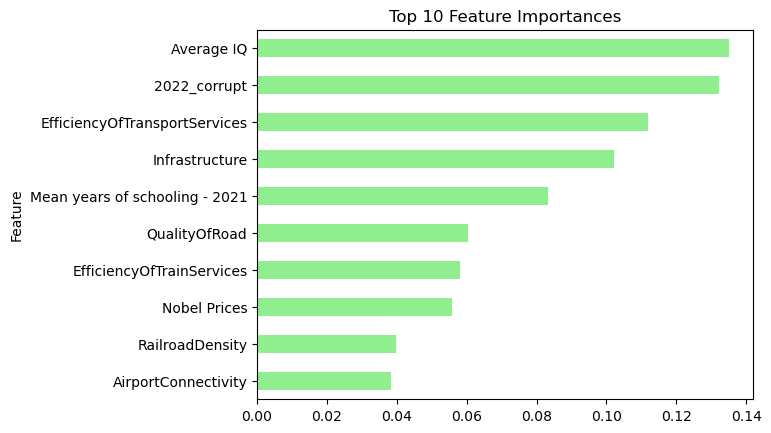

In [286]:
importances = rf_model.feature_importances_

# Sort the feature importances in descending order and select the top 5
top_5_features = sorted(zip(importances, X.columns), reverse=True)[:10]

# Create a DataFrame for visualization
importances_df = pd.DataFrame(top_5_features, columns=['Feature Importances', 'Feature'])
importances_df.set_index('Feature', inplace=True)

# Sort the DataFrame by 'Feature Importances' in ascending order
importances_sorted = importances_df.sort_values(by='Feature Importances', ascending=True)

# Visualize the top 5 features by importance
importances_sorted.plot(kind='barh', color='lightgreen', title='Top 10 Feature Importances', legend=False)

In [287]:
X.columns

Index(['Infrastructure', 'RoadConnectivity', 'QualityOfRoad',
       'RailroadDensity', 'EfficiencyOfTrainServices', 'AirportConnectivity',
       'EfficiencyOfTransportServices', '2022_corrupt', 'Average IQ',
       'Literacy Rate',
       ...
       'Country/Territory_Uruguay', 'Country/Territory_Venezuela',
       'Country/Territory_Vietnam', 'Country/Territory_Zambia',
       'Country/Territory_Zimbabwe', 'UN region_Africa', 'UN region_Americas',
       'UN region_Asia', 'UN region_Europe', 'UN region_Oceania'],
      dtype='object', length=114)

In [288]:
X = X[['Average IQ','2022_corrupt','EfficiencyOfTransportServices','Mean years of schooling - 2021','EfficiencyOfTrainServices']]


In [289]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [290]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

## Logistic Regression

In [291]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=2)
classifier


LogisticRegression(max_iter=200, random_state=2)

In [292]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=2)

In [293]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9583333333333334
Testing Data Score: 0.9166666666666666


In [294]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,0,1
7,1,1
8,1,1
9,0,0


In [295]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.9166666666666666

## Fitting the Random Forest Model

In [296]:
# Create a random forest classifier

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [297]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [298]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [299]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6,1
Actual 1,1,16


Accuracy Score : 0.9166666666666666
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.94      0.94      0.94        17

    accuracy                           0.92        24
   macro avg       0.90      0.90      0.90        24
weighted avg       0.92      0.92      0.92        24



## Neural Links

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [301]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [311]:
number_input_features = X_train.shape[1]
number_input_features

5

In [323]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 15
hidden_nodes_layer3 = 10
hidden_nodes_layer4 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 20)                120       
                                                                 
 dense_57 (Dense)            (None, 15)                315       
                                                                 
 dense_58 (Dense)            (None, 10)                160       
                                                                 
 dense_59 (Dense)            (None, 5)                 55        
                                                                 
 dense_60 (Dense)            (None, 1)                 6         
                                                                 
Total params: 656
Trainable params: 656
Non-trainable params: 0
_________________________________________________________________


In [324]:
# Compile the Model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [325]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 80)

Epoch 1/80
3/3 [==============================] - 1s 3ms/step - loss: 0.7371 - accuracy: 0.3333
Epoch 2/80
3/3 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.4028
Epoch 3/80
3/3 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5278
Epoch 4/80
3/3 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.5833
Epoch 5/80
3/3 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6250
Epoch 6/80
3/3 [==============================] - 0s 3ms/step - loss: 0.6201 - accuracy: 0.7500
Epoch 7/80
3/3 [==============================] - 0s 3ms/step - loss: 0.6027 - accuracy: 0.7917
Epoch 8/80
3/3 [==============================] - 0s 3ms/step - loss: 0.5873 - accuracy: 0.8056
Epoch 9/80
3/3 [==============================] - 0s 3ms/step - loss: 0.5734 - accuracy: 0.8194
Epoch 10/80
3/3 [==============================] - 0s 3ms/step - loss: 0.5605 - accuracy: 0.8333
Epoch 11/80
3/3 [======================

In [326]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.1472 - accuracy: 0.9583 - 167ms/epoch - 167ms/step
Loss: 0.14721132814884186, Accuracy: 0.9583333134651184


In [329]:
import statsmodels.api as sm
y = econ['Forecast 2023']

X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Forecast 2023   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     42.39
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           3.12e-22
Time:                        18:43:11   Log-Likelihood:                -1058.1
No. Observations:                  96   AIC:                             2128.
Df Residuals:                      90   BIC:                             2144.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [332]:
import matplotlib.pyplot as plt
X = X[['Average IQ','2022_corrupt','EfficiencyOfTransportServices','Mean years of schooling - 2021','EfficiencyOfTrainServices']]

X.corr(method='pearson')

,Average IQ,2022_corrupt,EfficiencyOfTransportServices,Mean years of schooling - 2021,EfficiencyOfTrainServices
Average IQ,1.000000,0.684104,0.645990,0.754218,0.630519
2022_corrupt,0.684104,1.000000,0.728224,0.593783,0.569080
EfficiencyOfTransportServices,0.645990,0.728224,1.000000,0.578106,0.732132
Mean years of schooling - 2021,0.754218,0.593783,0.578106,1.000000,0.509637
EfficiencyOfTrainServices,0.630519,0.569080,0.732132,0.509637,1.000000


In [333]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                         variable        VIF
0                      Average IQ  43.383340
1                    2022_corrupt  16.925406
2   EfficiencyOfTransportServices  48.304081
3  Mean years of schooling - 2021  28.488665
4       EfficiencyOfTrainServices  11.951429
